<a href="https://colab.research.google.com/github/dmf49/cs5542FinalProject/blob/main/BDAA_PROJECT_Predict_Age_Gender_Ethnicity_Vasim_Shaikh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Age , Gender and Ethnicity 

Aim of this project to build a single model to predict Age , Gender and ethnicity

This dataset includes a CSV of facial images that are labeled on the basis of age, gender, and ethnicity.
The dataset includes 27305 rows and 5 columns.

In [1]:
# Importing required libraries
import numpy as np 
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split

# Input data and pre-processing
Connecting to google drive to read input data file

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading input data from from googel drive. Data file is also uploaded at github link provided in the report. 

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/age_gender.csv")

Splitting the pixels data and setting the data type to float 32 for processing.

In [5]:
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

Checking input data details

In [6]:
data.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


Printing first 5 records from input data

In [7]:
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


Checking number of rows and clumns in input data

In [8]:
print('Total rows: {}'.format(len(data)))
print('Total columns: {}'.format(len(data.columns)))

Total rows: 23705
Total columns: 5


Checking null values if any.

In [9]:
data.isnull().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

Normalizing the pixels data and calculating the distribution

In [10]:
data['pixels'] = data['pixels'].apply(lambda x: x/255)

age_dist = data['age'].value_counts()
ethnicity_dist = data['ethnicity'].value_counts()
gender_dist = data['gender'].value_counts().rename(index={0:'Male',1:'Female'})

def ditribution_plot(x,y,name):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(title_text=name)
    fig.show()

Plotting age distribution

In [11]:
ditribution_plot(x=age_dist.index, y=age_dist.values, name='Age Distribution')

Plotting Ethnicity distribution

In [12]:
ditribution_plot(x=ethnicity_dist.index, y=ethnicity_dist.values, name='Ethnicity Distribution')

Plotting Gender distribution

In [13]:
ditribution_plot(x=gender_dist.index, y=gender_dist.values, name='Gender Distribution')

Taking pixels data in an array and conveting it from 1D to 3D

In [14]:
X = np.array(data['pixels'].tolist())
X = X.reshape(X.shape[0],48,48,1)

Printing input images with Age, Gender and Ethnicity labels

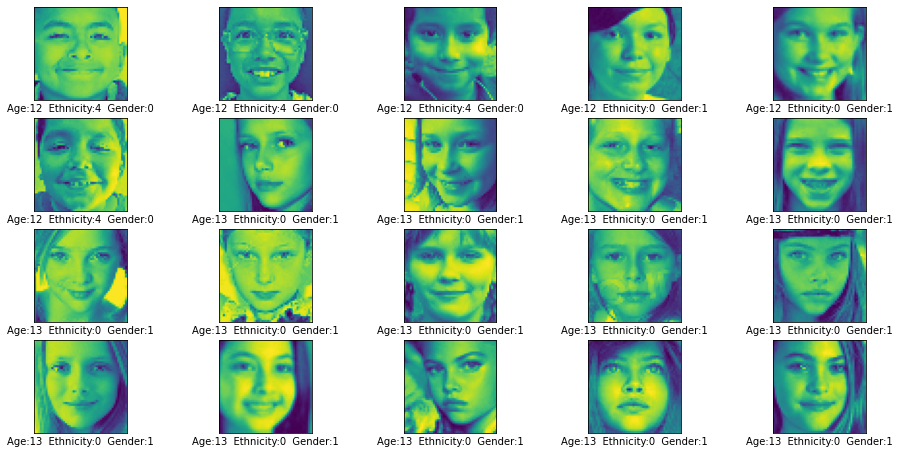

In [15]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(8,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(data['age'].iloc[i])+
        "  Ethnicity:"+str(data['ethnicity'].iloc[i])+
        "  Gender:"+ str(data['gender'].iloc[i])
    )
plt.show()

Colleting all input labels in a list, so that it will be easier to train the model.

In [16]:
ages=[]
genders=[]
ethnicities=[]

ages = data['age']
genders = data['gender']
ethnicities = data['ethnicity']

labels=[]
i=0
while i<len(ages):
  label=[]
  label.append([ages[i]])
  label.append([genders[i]])
  label.append([ethnicities[i]])
  labels.append(label)
  i+=1

labels_f=np.array(labels)

Checking input image shape.

In [17]:
X.shape

(23705, 48, 48, 1)

Splitting data in train and test - 70/30 ratio.

In [18]:
X_train, X_test, Y_train, Y_test= train_test_split(X, labels_f,test_size=0.30, random_state=40)

Printing first 5 records from Y_train

In [19]:
Y_train[0:5]

array([[[65],
        [ 1],
        [ 0]],

       [[85],
        [ 0],
        [ 1]],

       [[35],
        [ 0],
        [ 1]],

       [[29],
        [ 0],
        [ 1]],

       [[ 8],
        [ 1],
        [ 4]]])

Checking shape for train and test data after splitting

In [20]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(16593, 48, 48, 1)
(16593, 3, 1)
(7112, 48, 48, 1)
(7112, 3, 1)


Converting Gender and Ethnicity train and test data in to_categorical and collecting in updated array

In [21]:
from keras.utils import to_categorical
Y_train_2= [to_categorical(Y_train[:,1],dtype=int),Y_train[:,0],to_categorical(Y_train[:,2],dtype=int)]
Y_test_2= [to_categorical(Y_test[:,1], dtype=int),Y_test[:,0],to_categorical(Y_test[:,2],dtype=int)]

# Model Implementation
Importing required libraries for model implementation

In [22]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

Function for convolution layer

In [23]:
def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same')(input_tensor)
   # x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x

CNN model defination. Single model with 3 outputs for Gender, Age and Ethnicity.

In [24]:
def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,16)
  bnorm_1= BatchNormalization(axis=-1) (conv_1)
  maxp_1 = MaxPooling2D(pool_size = (3,3)) (bnorm_1)
  conv_2 = Convolution(maxp_1,32)
  bnorm_2= BatchNormalization() (conv_2)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (bnorm_2)
  conv_3 = Convolution(maxp_2,32)
  bnorm_3= BatchNormalization() (conv_3)
  drop_3 = Dropout(0.5)(bnorm_3)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (drop_3)
  conv_4 = Convolution(maxp_3,128)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  drop_4=Dropout(0.5)(maxp_4)
  flatten= Flatten() (drop_4)
  dense_1= Dense(128,activation='relu')(flatten)
  bnorm_4= BatchNormalization() (dense_1)
  drop_4=Dropout(0.5)(bnorm_4)
  
  gender_out= Dense(2,activation="softmax",name='gender_out')(drop_4)
  age_out= Dense(1,activation="linear",name='age_out')(drop_4)
  ethnicity_out= Dense(5,activation="sigmoid",name='ethnicity_out')(drop_4)
 
  model = Model(inputs=inputs, outputs=[gender_out, age_out,ethnicity_out])

  init_lr = 0.0001
  epochs = 100
  opt = Adam(lr=init_lr, decay=init_lr / epochs)

  model.compile(optimizer=opt,
              loss={'gender_out': 'categorical_crossentropy','age_out': 'mean_squared_error','ethnicity_out': 'categorical_crossentropy'},
              loss_weights={'gender_out': 0.1,'age_out': 4.,'ethnicity_out': 1.5},
              metrics={'gender_out': 'accuracy','age_out': 'mae','ethnicity_out': 'accuracy'})
  
  return model

# Model Training

In [25]:
Model=model((48,48,1))

In [26]:
Model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 48, 48, 16)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 48, 48, 16)   64          activation[0][0]                 
_______________________________________________________________________________________

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [28]:
fle_s='Age_Gender_Ethnicity_Detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [29]:
History=Model.fit(X_train,Y_train_2,batch_size=32,validation_data=(X_test,Y_test_2),epochs=500,callbacks=[callback_list])

Epoch 1/500
519/519 [==============================] - ETA: 0s - loss: 5854.3506 - gender_out_loss: 1.2076 - age_out_loss: 1462.8472 - ethnicity_out_loss: 1.8940 - gender_out_accuracy: 0.4898 - age_out_mae: 32.9230 - ethnicity_out_accuracy: 0.2105
Epoch 00001: val_loss improved from inf to 5296.50781, saving model to Age_Gender_Ethnicity_Detection.h5
519/519 [==============================] - 6s 12ms/step - loss: 5854.3506 - gender_out_loss: 1.2076 - age_out_loss: 1462.8472 - ethnicity_out_loss: 1.8940 - gender_out_accuracy: 0.4898 - age_out_mae: 32.9230 - ethnicity_out_accuracy: 0.2105 - val_loss: 5296.5078 - val_gender_out_loss: 0.8939 - val_age_out_loss: 1323.5135 - val_ethnicity_out_loss: 1.5768 - val_gender_out_accuracy: 0.4837 - val_age_out_mae: 30.7587 - val_ethnicity_out_accuracy: 0.1845
Epoch 2/500
517/519 [============================>.] - ETA: 0s - loss: 5335.0630 - gender_out_loss: 1.0114 - age_out_loss: 1333.0656 - ethnicity_out_loss: 1.7989 - gender_out_accuracy: 0.5056 -

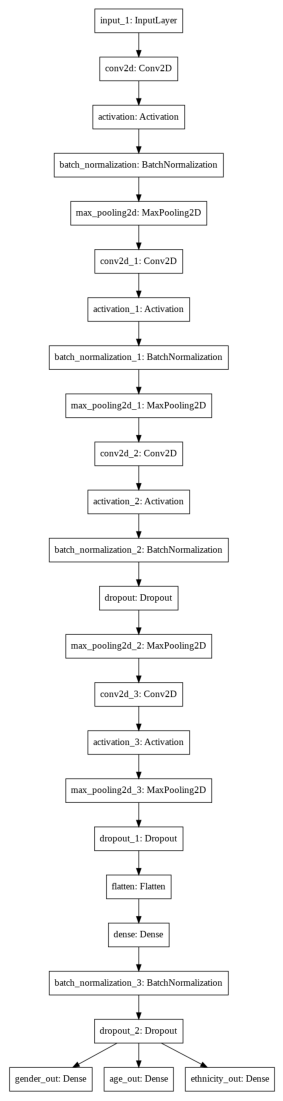

In [31]:
%matplotlib inline

from keras.utils import plot_model
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plot_model(Model, to_file='mymodel.png')
img = mpimg.imread('mymodel.png')

plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(img)

# Model Evaluation

In [32]:
Model.evaluate(X_test,Y_test_2)

223/223 [==============================] - 1s 5ms/step - loss: 439.0286 - gender_out_loss: 0.6530 - age_out_loss: 109.2352 - ethnicity_out_loss: 1.3482 - gender_out_accuracy: 0.6486 - age_out_mae: 8.0798 - ethnicity_out_accuracy: 0.4369


[439.02862548828125,
 0.6530343890190125,
 109.23519134521484,
 1.3482275009155273,
 0.6486220359802246,
 8.079804420471191,
 0.43686726689338684]

In [33]:
pred=Model.predict(X_test)
print(pred)

[array([[0.45946887, 0.54053116],
       [0.57680565, 0.42319435],
       [0.5136755 , 0.4863245 ],
       ...,
       [0.39376998, 0.60623   ],
       [0.43567014, 0.56432986],
       [0.5361206 , 0.46387938]], dtype=float32), array([[29.329369],
       [38.018867],
       [21.71304 ],
       ...,
       [18.724117],
       [24.393976],
       [41.735703]], dtype=float32), array([[0.7472086 , 0.56076425, 0.22959852, 0.47574732, 0.22743995],
       [0.7780621 , 0.5807701 , 0.08822866, 0.37164435, 0.13418531],
       [0.88530767, 0.3840697 , 0.29815412, 0.34331864, 0.2499845 ],
       ...,
       [0.7897973 , 0.54345095, 0.43737656, 0.506384  , 0.31204885],
       [0.7367867 , 0.6065243 , 0.31522435, 0.49231857, 0.25095946],
       [0.8652182 , 0.37912676, 0.16189754, 0.27926746, 0.09702523]],
      dtype=float32)]


Plotting model loss.

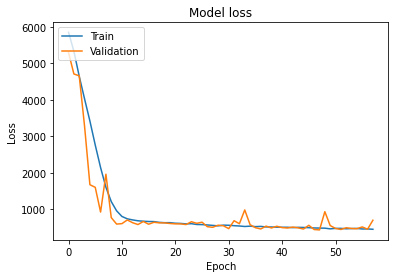

In [34]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

Plotting gender Accuracy

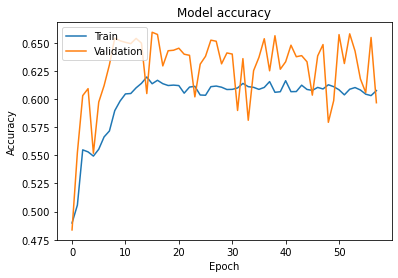

In [35]:
plt.plot(History.history['gender_out_accuracy'])
plt.plot(History.history['val_gender_out_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

Plotting Age MSE

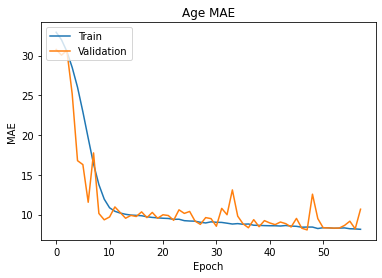

In [36]:
plt.plot(History.history['age_out_mae'])
plt.plot(History.history['val_age_out_mae'])
plt.title('Age MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


Plotting Ethnicity Accuracy

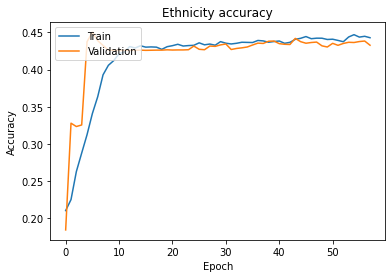

In [37]:
plt.plot(History.history['ethnicity_out_accuracy'])
plt.plot(History.history['val_ethnicity_out_accuracy'])
plt.title('Ethnicity accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


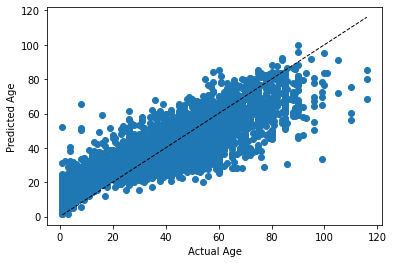

In [40]:
fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=1)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [41]:
i=0
Pred_l=[]
while(i<len(pred[1])):
  Pred_l.append(int(np.round(pred[1][i])))
  i+=1

In [42]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [ ]:
results = confusion_matrix((np.argmax(Y_test_2[2],axis=1)), Pred_l)

In [ ]:
import seaborn as sns
sns.heatmap(results, annot=True)

Defining a validation function to test the images

In [51]:
def validate(ind,Model):
  plt.imshow(data['pixels'].iloc[ind].reshape(48,48))
  test = np.array(data['pixels'].iloc[ind])
  test = test.reshape(48,48,1)
  pred_1=Model.predict(np.array([test]))
  print(pred_1)
  sex_f=['Male','Female']
  ethnicity_f=['White', 'Black', 'Asian', 'Indian', 'Others']
  
  gender=int(np.round(np.argmax(pred_1[0][0])))
  age=int(np.round(pred_1[1][0]))
  ethnicity=int(np.round(np.argmax(pred_1[2][0])))
  print("Predicted Age: "+ str(age) +"   "+ "Predicted Gender: "+ sex_f[gender] +"   "+ "Predicted Ethnicity: "+ ethnicity_f[ethnicity])
  print("Actual Age: "+ str(np.array(data['age'].iloc[ind])) +"   "+ "Actual Gender: "+ sex_f[np.array(data['gender'].iloc[ind])] +"   "+ "Actaul Ethnicity: "+ ethnicity_f[np.array(data['ethnicity'].iloc[ind])])

[array([[0.4837747 , 0.51622534]], dtype=float32), array([[30.371433]], dtype=float32), array([[0.7336543 , 0.5439532 , 0.24437378, 0.47437048, 0.20127003]],
      dtype=float32)]
Predicted Age: 30   Predicted Gender: Female   Predicted Ethnicity: White
Actual Age: 25   Actual Gender: Female   Actaul Ethnicity: Indian


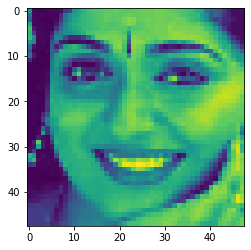

In [61]:
validate(5500,Model)

[array([[0.646096  , 0.35390398]], dtype=float32), array([[68.092094]], dtype=float32), array([[0.99288017, 0.12045052, 0.09455199, 0.08743995, 0.01205778]],
      dtype=float32)]
Predicted Age: 68   Predicted Gender: Male   Predicted Ethnicity: White
Actual Age: 80   Actual Gender: Male   Actaul Ethnicity: White


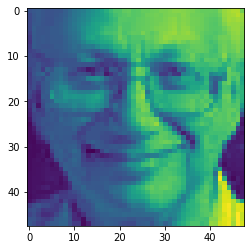

In [53]:
validate(23000,Model)

[array([[0.45131683, 0.54868317]], dtype=float32), array([[26.29586]], dtype=float32), array([[0.7247887 , 0.52056134, 0.28895998, 0.41884586, 0.20556144]],
      dtype=float32)]
Predicted Age: 26   Predicted Gender: Female   Predicted Ethnicity: White
Actual Age: 25   Actual Gender: Female   Actaul Ethnicity: Asian


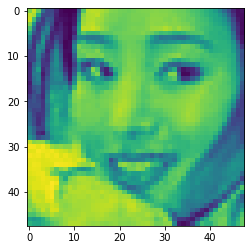

In [54]:
validate(6000,Model)

[array([[0.47838682, 0.5216132 ]], dtype=float32), array([[30.697933]], dtype=float32), array([[0.7582336 , 0.51424515, 0.20435648, 0.4293704 , 0.19937155]],
      dtype=float32)]
Predicted Age: 31   Predicted Gender: Female   Predicted Ethnicity: White
Actual Age: 26   Actual Gender: Female   Actaul Ethnicity: Indian


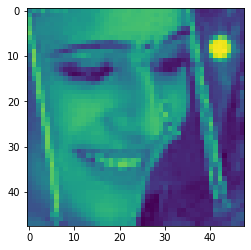

In [55]:
validate(7000,Model)